In [1]:
import pandas as pd
import numpy as np

# 准备数据
data = pd.read_csv(r'skater_stats.csv',encoding='utf-8')
print(data)

                  Unnamed: 0  Season             Player   Age     Tm   Pos  \
0      2018Justin Abdelkader    2018  Justin Abdelkader  30.0   DET    LW    
1           2018Pontus Aberg    2018       Pontus Aberg  24.0   TOT    LW    
2           2018Noel Acciari    2018       Noel Acciari  26.0   BOS     C    
3         2018Kenny Agostino    2018     Kenny Agostino  25.0   BOS    LW    
4          2018Sebastian Aho    2018      Sebastian Aho  20.0   CAR    RW    
...                      ...     ...                ...   ...    ...   ...   
37820    1940Gordie Drillon*    1940    Gordie Drillon*  26.0   TOR    RW    
37821       1940Bill Cowley*    1940       Bill Cowley*  27.0   BOS     C    
37822      1940Woody Dumart*    1940      Woody Dumart*  23.0   BOS    LW    
37823       1940Bobby Bauer*    1940       Bobby Bauer*  24.0   BOS    RW    
37824      1940Milt Schmidt*    1940      Milt Schmidt*  21.0   BOS     C    

       GP     G     GPG     A  ...  SHA      S    S%      TOI  

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data_ppp = data[['PTS','+/-','PIM']]
print(data_ppp)

data_ppp = data_ppp.dropna(axis=0, how='any') #删除表中某行含有任何NaN的行
print(data_ppp)

        PTS   +/-   PIM
0      35.0 -11.0  78.0
1      16.0   9.0  10.0
2      11.0  -6.0   9.0
3       1.0  -1.0   4.0
4      65.0   4.0  24.0
...     ...   ...   ...
37820  40.0   NaN  13.0
37821  40.0   NaN  24.0
37822  43.0   NaN  16.0
37823  43.0   NaN   2.0
37824  52.0   NaN  37.0

[37825 rows x 3 columns]
        PTS   +/-   PIM
0      35.0 -11.0  78.0
1      16.0   9.0  10.0
2      11.0  -6.0   9.0
3       1.0  -1.0   4.0
4      65.0   4.0  24.0
...     ...   ...   ...
33908  77.0  13.0  12.0
33909  78.0  23.0  18.0
33910  82.0  12.0  53.0
33911  84.0  19.0  21.0
33912  87.0  -3.0  14.0

[27334 rows x 3 columns]


In [3]:
# 转为numpy矩阵
data_X = np.array(data_ppp)
data_X = data_X[:10000] # 取前10000条数据作为示范
print(data_X)


[[ 35. -11.  78.]
 [ 16.   9.  10.]
 [ 11.  -6.   9.]
 ...
 [  9.  -3. 146.]
 [  9.   1.  22.]
 [  9. -12.  18.]]


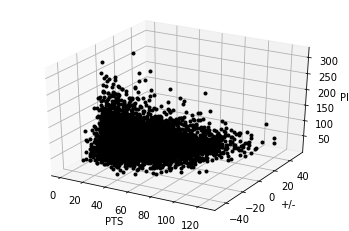

In [4]:
import matplotlib.pyplot as plt

# 可视化
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('PTS')
ax.set_ylabel('+/-')
ax.set_zlabel('PIM')
ax.plot(data_X[:,0], data_X[:,1], data_X[:,2],'k.')


In [5]:
import local_outlier_factor

# 计算离群值
k = 40
lof = local_outlier_factor.LOF(data_X)
lof.calc_lof(k)
print(lof.LOF)

X shape: (10000, 3)
[1.05406634 1.04829499 1.03601057 ... 0.99548297 1.02175774 1.03501786]


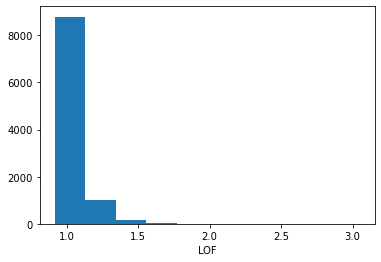

In [6]:
# 局部离群因子可视化统计
plt.hist(lof.LOF)
plt.xlabel('LOF')
plt.show()

In [7]:
# 剔除离群点
lof_threshold = 1.1 # 设定LOF阈值
X_lof_bool = lof.LOF <= lof_threshold
data_X_new = data_X[X_lof_bool,:]
print(data_X_new)

[[ 35. -11.  78.]
 [ 16.   9.  10.]
 [ 11.  -6.   9.]
 ...
 [  9.  -3. 146.]
 [  9.   1.  22.]
 [  9. -12.  18.]]


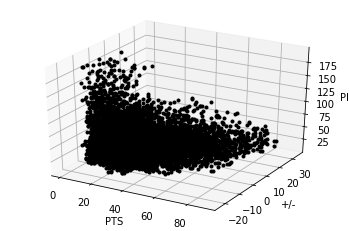

In [8]:
import matplotlib.pyplot as plt

# 可视化
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('PTS')
ax.set_ylabel('+/-')
ax.set_zlabel('PIM')
ax.plot(data_X_new[:,0], data_X_new[:,1], data_X_new[:,2],'k.')
